In [1]:
# To help you get started...
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

data_0 = pd.read_csv('exampleco_data/machine_0.csv')
data_0.columns = ['Time', '0', '1', '2', '3']
data_1 = pd.read_csv('exampleco_data/machine_1.csv')
data_1.columns = ['Time', '0', '1', '2', '3']

In [2]:
# TO-DO: Create a function to plot all 4 time series plots together using subplots.
def plot_time_series(df):
    plt.figure(figsize = (15, 5))
    plt.subplot(2, 2, 1)
    plt.plot(range(len(df)), df['0'])
    plt.subplot(2, 2, 2)
    plt.plot(range(len(df)), df['1'])
    plt.subplot(2, 2, 3)
    plt.plot(range(len(df)), df['2'])
    plt.subplot(2, 2, 4)
    plt.plot(range(len(df)), df['3'])   

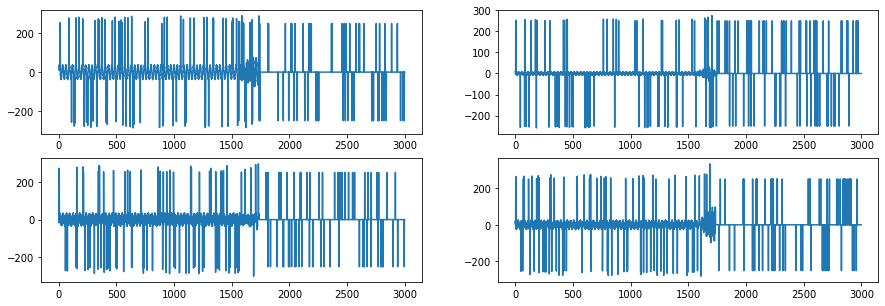

In [3]:
plot_time_series(data_1)

In [4]:
def remove_outliers(df):
    for i in range(4):
        data = df[str(i)]
        up_limit = data.mean() + (2 * data.std())
        down_limit = data.mean() - (2 * data.std())
        for j in range(len(data)): 
            if(data[j] > up_limit or data[j] < down_limit):
                if(j > 5):
                    data[j] = data[j-5:j+5].median()
                else:
                    data[j] = data[j:j+5].median()
        df[str(i)] = data  
    return df        

In [5]:
clean_data_0 = remove_outliers(data_0)
clean_data_1 = remove_outliers(data_1)

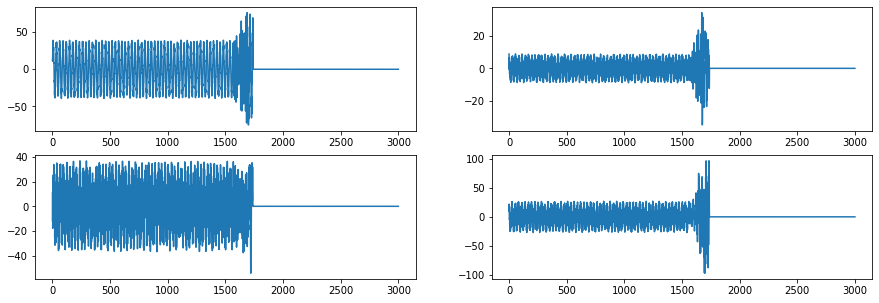

In [6]:
plot_time_series(clean_data_1)

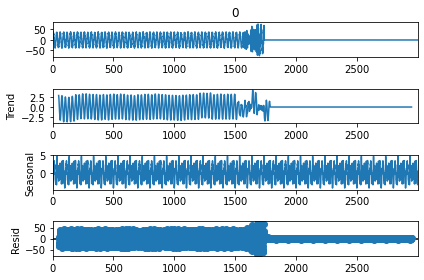

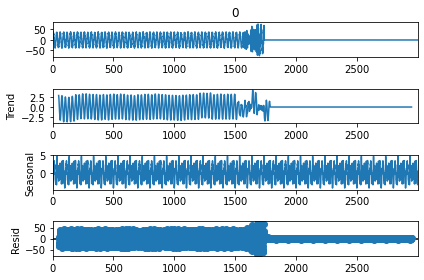

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(clean_data_1['0'], period = 100)
result.plot()